In [19]:
from google.colab import files
uploaded = files.upload()  # Upload user_preferences_detailed.csv and movies.csv


Saving movies (1).csv to movies (1) (1).csv
Saving user_preferences_detailed.csv to user_preferences_detailed (2).csv


In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load uploaded CSVs
users_df = pd.read_csv("user_preferences_detailed.csv")
movies_df = pd.read_csv(next(iter(uploaded)))  # Assuming 'movies.csv' was the only file uploaded

# Define genre list
genres = ['Action', 'Thriller', 'Science Fiction', 'Comedy', 'Romance', 'Drama', 'Horror']


In [22]:
def recommend_movies(user_index, top_n=5,movies_df=movies_df):
    user_vector = users_df.iloc[user_index][genres].values.reshape(1, -1)
    similarities = cosine_similarity(user_vector).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return movies_df.iloc[top_indices][['Title'] + genres]

# Example usage
user_index = 0
print(f"Recommended Movies for {users_df.iloc[user_index]['User Name']}:")
print(recommend_movies(user_index))


Recommended Movies for Alex Walker:
            Title  Action  Thriller  Science Fiction  Comedy  Romance  Drama  \
0  Ancient Shadow       4         1                2       5        5      0   

   Horror  
0       0  


In [23]:
kmeans = KMeans(n_clusters=10, random_state=42)
users_df['Cluster'] = kmeans.fit_predict(users_df[genres])

def find_similar_users(user_name):
    cluster = users_df.loc[users_df['User Name'] == user_name, 'Cluster'].values[0]
    similar_users = users_df[users_df['Cluster'] == cluster]
    return similar_users['User Name'].tolist()

# Example usage
target_user = users_df.iloc[0]['User Name']
print(f"Users similar to {target_user}:")
print(find_similar_users(target_user))


Users similar to Alex Walker:
['Alex Walker', 'Jamie Johnson', 'Skyler Hall', 'Skyler Young', 'Morgan Hall', 'Logan Hall', 'Riley Green', 'Taylor Allen', 'Skyler Brown', 'Taylor Smith', 'Jamie Walker', 'Casey Hall', 'Taylor Young', 'Morgan Hall', 'Jordan Hall', 'Skyler Brown', 'Logan Johnson', 'Morgan Green', 'Morgan Johnson', 'Cameron Lee', 'Cameron Brown', 'Jamie Johnson', 'Jamie Lee', 'Casey Young', 'Riley Green', 'Morgan Walker', 'Jordan Hall', 'Taylor Brown', 'Alex Hall', 'Taylor Hall', 'Jamie Walker', 'Cameron Green', 'Skyler Johnson', 'Riley Harris', 'Morgan Harris', 'Morgan Harris', 'Jamie Smith', 'Logan Lee', 'Skyler Lee', 'Logan Green', 'Morgan Walker', 'Cameron Hall', 'Morgan Allen', 'Skyler Smith', 'Alex Harris', 'Riley Johnson', 'Jordan Young', 'Skyler Johnson', 'Jordan Lee', 'Jordan Young', 'Taylor Harris', 'Cameron Brown', 'Jordan Walker', 'Riley Green', 'Cameron Hall', 'Skyler Brown', 'Jamie Allen', 'Alex Lee', 'Riley Green', 'Casey Brown', 'Logan Harris', 'Casey Walker

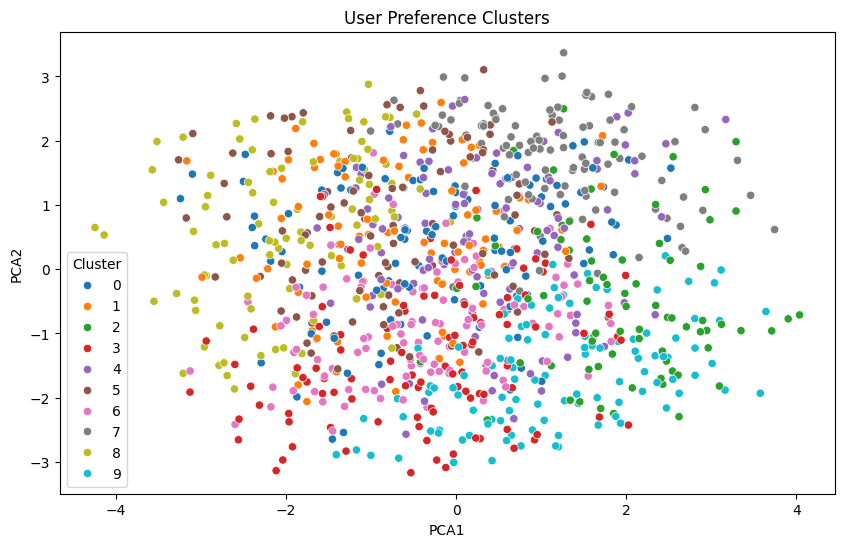

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(users_df[genres])
users_df['PCA1'], users_df['PCA2'] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=users_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title("User Preference Clusters")
plt.show()


In [25]:
# Simulate moods affecting genre weights
mood_profiles = {
    'Excited': {'Action': 1.5, 'Thriller': 1.3, 'Comedy': 0.8},
    'Romantic': {'Romance': 1.5, 'Drama': 1.2},
    'Adventurous': {'Science Fiction': 1.4, 'Action': 1.3},
    'Relaxed': {'Comedy': 1.5, 'Drama': 1.2},
    'Spooky': {'Horror': 2.0}
}

def recommend_by_mood(user_index, mood, top_n=5):
    user_vector = users_df.iloc[user_index][genres].copy()
    weights = mood_profiles.get(mood, {})
    for genre, weight in weights.items():
        if genre in user_vector:
            user_vector[genre] *= weight
    user_vector = user_vector.values.reshape(1, -1)
    movie_vectors = movies_df[genres].values
    similarities = cosine_similarity(user_vector, movie_vectors).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return movies_df.iloc[top_indices][['Title'] + genres]

# Example: Romantic mood for user 0
recommend_by_mood(0, 'Romantic')


,Title,Action,Thriller,Science Fiction,Comedy,Romance,Drama,Horror
197,Silent Warrior,4,2,2,1,5,2,1
475,Hidden Revenge,4,4,1,1,5,4,1
97,Silent Journey,3,2,1,3,4,2,1
452,Furious Heart,2,2,1,1,2,2,1
484,Brave Dream,3,2,3,1,5,1,1


In [26]:
def search_movies_by_genre(genre, min_score=3):
    if genre not in genres:
        return f"{genre} is not a valid genre."
    return movies_df[movies_df[genre] >= min_score][['Title', genre]].sort_values(by=genre, ascending=False)

# Example
search_movies_by_genre('Science Fiction', min_score=4)


,Title,Science Fiction
8,Bright Shadow,5
13,Ancient Dream,5
34,Bright Revenge,5
32,Lost Secret,5
27,Hidden Revenge,5
...,...,...
459,Lost Shadow,4
451,Epic Revenge,4
478,Furious Dream,4
495,Epic Warrior,4


from matplotlib import pyplot as plt
_df_0['Science Fiction'].plot(kind='hist', bins=20, title='Science Fiction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Science Fiction'].plot(kind='line', figsize=(8, 4), title='Science Fiction')
plt.gca().spines[['top', 'right']].set_visible(False)

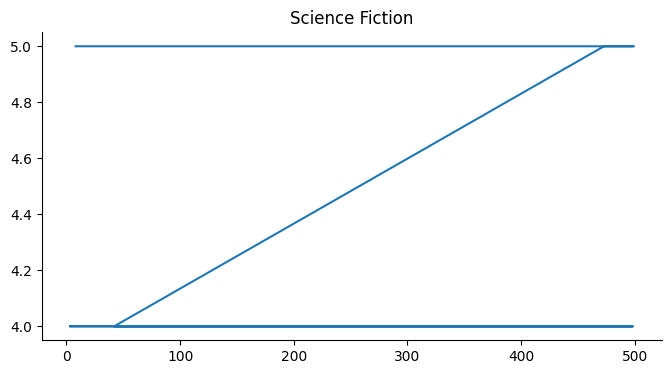

In [27]:
from matplotlib import pyplot as plt
_df_1['Science Fiction'].plot(kind='line', figsize=(8, 4), title='Science Fiction')
plt.gca().spines[['top', 'right']].set_visible(False)

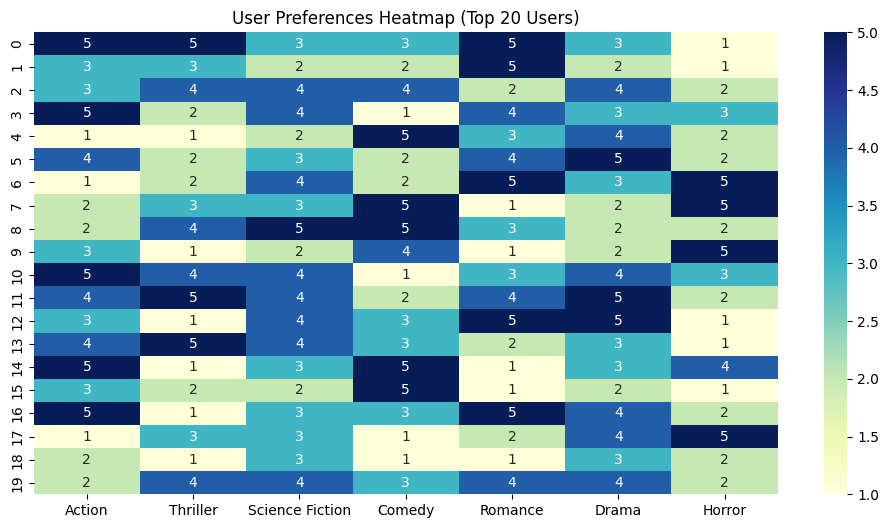

In [28]:
# Show heatmap of first 20 users
sample_users = users_df[genres].head(20)
plt.figure(figsize=(12, 6))
sns.heatmap(sample_users, annot=True, cmap="YlGnBu", xticklabels=genres)
plt.title("User Preferences Heatmap (Top 20 Users)")
plt.show()


In [29]:
def find_diverse_users(user_index, top_n=5):
    user_vector = users_df.iloc[user_index][genres].values.reshape(1, -1)
    user_similarity = cosine_similarity(user_vector, users_df[genres])[0]
    opposite_indices = user_similarity.argsort()[:top_n]  # lowest similarities
    return users_df.iloc[opposite_indices][['User Name'] + genres]

# Example
find_diverse_users(0)


,User Name,Action,Thriller,Science Fiction,Comedy,Romance,Drama,Horror
852,Alex Hall,1,2,1,5,1,1,5
278,Casey Brown,1,1,5,1,1,5,4
757,Jamie Green,1,1,4,3,1,2,5
419,Casey Young,2,1,2,3,1,1,5
739,Riley Allen,1,2,5,5,1,2,5
